In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Preparing the data

In [76]:
df = pd.read_csv("withzip1.csv")
df.head()

,Unnamed: 0,Location_Desc,Police_Beat,Street_Type,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Prefix,Street_Name,...,Y,GEOID10,GEOID00,Police_Division,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour,zip_codes
0,0,NaN,14D40,RD,1,NaN,Burglary,5600-5699,NaN,SELINSKY,...,29.637514,4.820133e+14,4.820133e+14,Southeast Division,K066,Minnetex,1,NaN,8,77048.0
1,1,NaN,7C20,NaN,2,NaN,Theft,3900-3999,NaN,CAVALCADE,...,29.800081,4.820121e+14,4.820121e+14,Northeast Division,K004,Kashmere Gardens,1,NaN,11,77026.0
2,2,NaN,13D40,PKWY,3,NaN,Theft,8500-8599,S,SAM HOUSTON,...,29.625560,4.820133e+14,4.820133e+14,Southwest Division,K070,Five Corners,1,NaN,15,77085.0
3,3,NaN,18F40,RD,4,NaN,Robbery,2700-2799,NaN,DUNVALE,...,29.736820,4.820143e+14,4.820143e+14,Midwest Division,K080,Mid-West,1,NaN,14,77063.0
4,4,RESTAURANT/CAFETERIA,24C60,PKWY,5,09/08/1914,Burglary,12700-12799,W,LAKE HOUSTON,...,29.924672,4.820125e+14,4.820125e+14,Kingwood Division,K106,Lake Houston,1,210,7,77044.0


In [77]:
raw = df.dropna(subset = ['Date_Reported'])
df.shape
raw.shape

(1094203, 25)

In [78]:
raw['Year'] = raw['Date_Reported'].apply(lambda row: str(row)[-4:])
raw['Year'].head(10)

4     1914
5     1914
6     1914
7     1915
8     1915
9     1915
10    1915
11    1915
12    1915
13    1915
Name: Year, dtype: object

In [79]:
raw['Year'] = raw['Year'].apply(lambda row: int(row))
temp = raw[raw.Year >= 2009]
data = temp[temp.Year <= 2017]
data.shape

(1092795, 26)

In [80]:
# Dataframe of zipcode, year, number of crimes
counts = data.groupby(['zip_codes', 'Year']).size().reset_index(name='counts')

## 77005 -- EDA

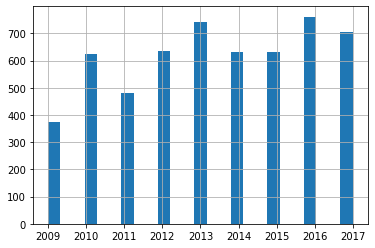

In [81]:
# number of crimes per year for 77005
rice_crime = data[data.zip_codes==77005]
# histogram
rice_crime.Year.hist(bins=25);

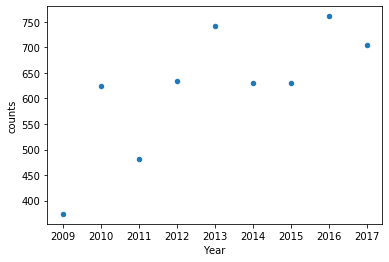

In [82]:
# scatterplot
rice_crime1 = counts[counts.zip_codes==77005]
rice_crime1.plot.scatter(x='Year', y="counts")

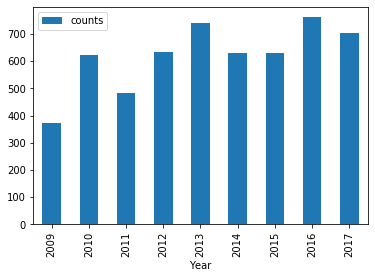

In [83]:
# bar plot
rice_crime1 = counts[counts.zip_codes==77005]
rice_crime1.plot(x="Year", y="counts", kind="bar")

## 77005 -- Modeling

In [84]:
rice_crime_counts = rice_crime.groupby(['Year']).size().reset_index(name='counts')
# prep data for regression
X = rice_crime_counts[['Year']]
y = rice_crime_counts['counts']

In [85]:
# fit linear regression
regression = LinearRegression(fit_intercept=True)
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [33.78333333]


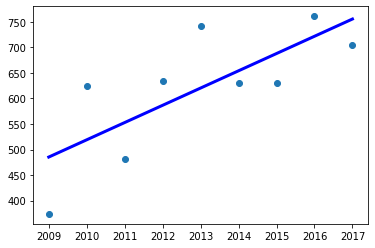

In [86]:
# fit X to regression line
y_pred = regression.predict(X)
# coefficients
print('Coefficients: \n', regression.coef_)
# Graph results
plt.scatter(x=X, y=y)
plt.plot(X, y_pred, color='blue', linewidth=3)

## 77005 -- Evaluating the Model

In [87]:
mse = mean_squared_error(y, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  5947.93395061701


In [88]:
variance_score = r2_score(y, y_pred)
print("Variance score:", variance_score)

Variance score: 0.561254749146722


## Finding zipcodes with the most and least crime

In [89]:
counts1 = counts.groupby(['zip_codes'])
counts1.head()
counts2 = counts1['zip_codes', 'counts'].apply(pd.DataFrame)
dct = {}
for b in counts2.iterrows():
    if not b[1][0] in dct:
        dct[b[1][0]] = b[1][1]
    else:
        dct[b[1][0]] += b[1][1]

maxValue = 0
maxKey = 0
minValue = 100000
minKey = 0
for key, value in dct.items():
    if value > maxValue:
        maxValue =  value
        maxKey = key
    if value < minValue:
        minValue = value
        minKey = key
print("Zip Code with the Most Crime:", maxKey, " Number of Crimes:", maxValue)
print("Zip Code with the Least Crime:", minKey, " Number of Crimes:", minValue)

Zip Code with the Most Crime: 77036.0  Number of Crimes: 38432.0
Zip Code with the Least Crime: 77536.0  Number of Crimes: 1.0


## 77036 -- EDA

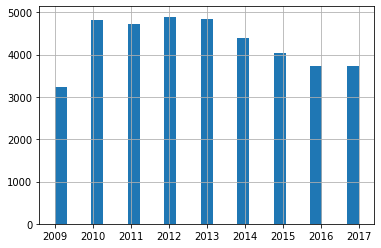

In [90]:
# number of crimes per year for 77036
sketch_crime = data[data.zip_codes==77036]
# histogram
sketch_crime.Year.hist(bins=25);

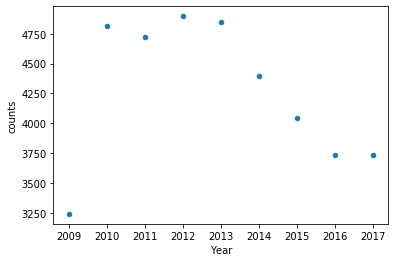

In [91]:
# scatterplot
sketch_crime1 = counts[counts.zip_codes==77036]
sketch_crime1.plot.scatter(x='Year', y="counts")

## 77036 -- Modeling

In [92]:
sketch_crime_counts = sketch_crime.groupby(['Year']).size().reset_index(name='counts')
# prep data for regression
X = sketch_crime_counts[['Year']]
y = sketch_crime_counts['counts']

In [93]:
# fit linear regression
regression = LinearRegression(fit_intercept=True)
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [-52.05]


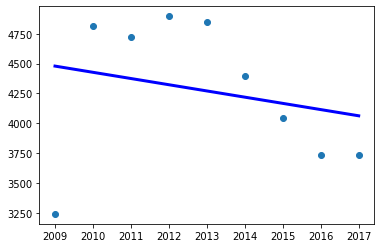

In [94]:
# fit X to regression line
y_pred = regression.predict(X)
# coefficients
print('Coefficients: \n', regression.coef_)
# Graph results
plt.scatter(x=X, y=y)
plt.plot(X, y_pred, color='blue', linewidth=3)

## 77036 -- Evaluating the Model

In [95]:
mse = mean_squared_error(y, y_pred)
print("Mean squared error: ", mse)

variance_score = r2_score(y, y_pred)
print("Variance score:", variance_score)

Mean squared error:  307929.9339506156
Variance score: 0.055404395421620234


## Downtown -- EDA

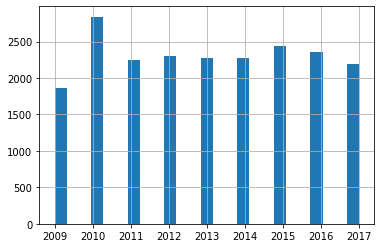

In [96]:
# number of crimes per year for 77002
downtown_crime = data[data.zip_codes==77002]
# histogram
downtown_crime.Year.hist(bins=25);

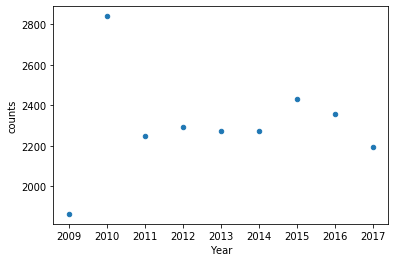

In [97]:
# scatterplot
downtown_crime1 = counts[counts.zip_codes==77002]
downtown_crime1.plot.scatter(x='Year', y="counts")

## Downtown -- Modeling

In [98]:
downtown_crime_counts = downtown_crime.groupby(['Year']).size().reset_index(name='counts')
# prep data for regression
X = downtown_crime_counts[['Year']]
y = downtown_crime_counts['counts']

In [99]:
# fit linear regression
regression = LinearRegression(fit_intercept=True)
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [3.91666667]


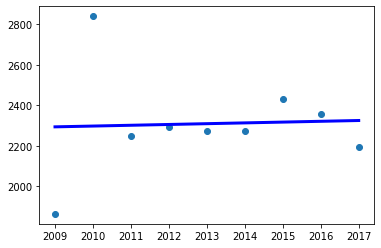

In [100]:
# fit X to regression line
y_pred = regression.predict(X)
# coefficients
print('Coefficients: \n', regression.coef_)
# Graph results
plt.scatter(x=X, y=y)
plt.plot(X, y_pred, color='blue', linewidth=3)

## Downtown -- Evaluating the Model

In [101]:
mse = mean_squared_error(y, y_pred)
print("Mean squared error: ", mse)

variance_score = r2_score(y, y_pred)
print("Variance score:", variance_score)

Mean squared error:  57437.06481481476
Variance score: 0.001777367108619754
